In [35]:
import matplotlib as plt
%matplotlib inline
import pandas_datareader as pdr
import fix_yahoo_finance as yf
pdr.data.get_data_yahoo = lambda *a, **kw: yf.download(*a, **kw, progress=False)
import ffn
#%pylab inline

In [15]:
data = ffn.get('agg,hyg,spy,eem,efa', start='2010-01-01', end='2014-01-01')
data.head()

,agg,hyg,spy,eem,efa
Date,,,,,
2009-12-31,82.249107,51.848492,93.934990,35.182888,42.754688
2010-01-04,82.344780,52.255756,95.528107,36.208694,43.876133
2010-01-05,82.719368,52.503662,95.780975,36.471504,43.914810
2010-01-06,82.671570,52.639458,95.848396,36.547813,44.100437
2010-01-07,82.575928,52.851925,96.253014,36.335861,43.930283


In [16]:
returns = data.to_log_returns().dropna()
returns.head()

,agg,hyg,spy,eem,efa
Date,,,,,
2010-01-04,0.001163,0.007824,0.016818,0.028739,0.025892
2010-01-05,0.004539,0.004733,0.002644,0.007232,0.000881
2010-01-06,-0.000578,0.002583,0.000704,0.002090,0.004218
2010-01-07,-0.001158,0.004028,0.004213,-0.005816,-0.003866
2010-01-08,0.000579,0.001562,0.003322,0.007902,0.007891


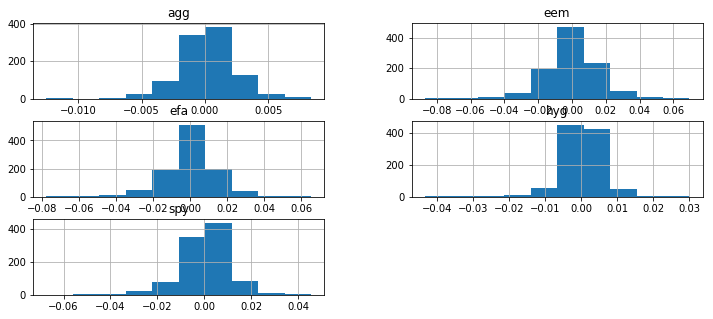

In [36]:
ax = returns.hist(figsize=(12, 5))

In [32]:
returns.corr().as_format('.2f')

,agg,hyg,spy,eem,efa
agg,1.00,-0.11,-0.32,-0.23,-0.29
hyg,-0.11,1.00,0.77,0.75,0.76
spy,-0.32,0.77,1.00,0.88,0.92
eem,-0.23,0.75,0.88,1.00,0.90
efa,-0.29,0.76,0.92,0.90,1.00


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

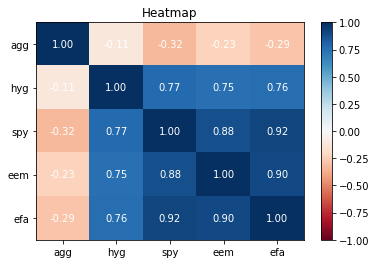

In [37]:
returns.plot_corr_heatmap()

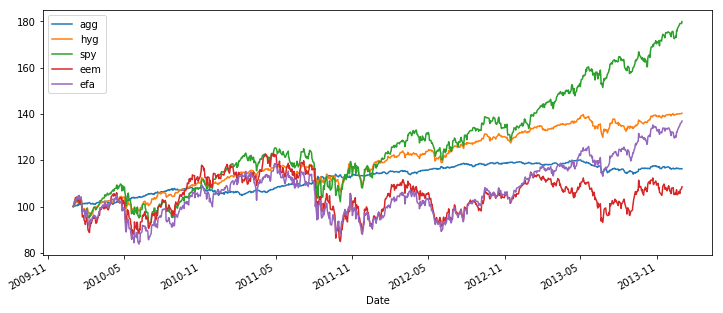

In [38]:
ax = data.rebase().plot(figsize=(12,5))

In [39]:
perf = data.calc_stats()

C:\ProgramData\Anaconda3\lib\site-packages\ffn\core.py:2054: RuntimeWarning: invalid value encountered in minimum
  negative_returns = np.minimum(returns, 0.)
C:\ProgramData\Anaconda3\lib\site-packages\ffn\core.py:2056: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


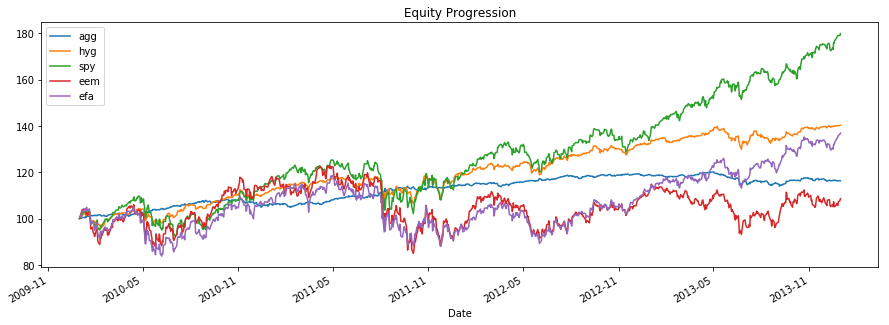

In [40]:
perf.plot()

In [41]:
perf.display()

Stat                 agg         hyg         spy         eem         efa
-------------------  ----------  ----------  ----------  ----------  ----------
Start                2009-12-31  2009-12-31  2009-12-31  2009-12-31  2009-12-31
End                  2013-12-31  2013-12-31  2013-12-31  2013-12-31  2013-12-31
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         16.29%      40.32%      79.92%      8.54%       36.93%
Daily Sharpe         1.10        0.99        0.96        0.21        0.46
Daily Sortino        1.82        1.55        1.52        0.34        0.74
CAGR                 3.85%       8.84%       15.82%      2.07%       8.17%
Max Drawdown         -5.14%      -10.06%     -18.61%     -30.87%     -25.86%
Calmar Ratio         0.75        0.88        0.85        0.07        0.32

MTD                  -0.73%      0.41%       2.59%       -0.41%      2.18%
3m                   -0.16%      3.42%       10.52%      3.48%       6.08%
6m        

In [42]:
# we can also use perf[2] in this case
perf['spy'].display_monthly_returns()

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2009   0      0      0      0      0      0      0      0      0      0      0      0      0
  2010  -3.63   3.12   6.09   1.55  -7.95  -5.17   6.83  -4.5    8.96   3.82   0      6.69  15.06
  2011   2.33   3.47   0.01   2.9   -1.12  -1.69  -2     -5.5   -6.94  10.91  -0.41   1.04   1.9
  2012   4.64   4.34   3.22  -0.67  -6.01   4.06   1.18   2.51   2.54  -1.82   0.57   0.89  15.99
  2013   5.12   1.28   3.8    1.92   2.36  -1.33   5.17  -3      3.16   4.63   2.96   2.59  32.31


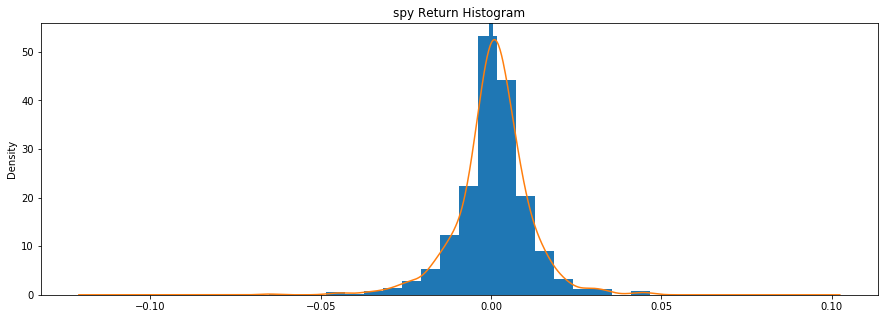

In [43]:
perf[2].plot_histogram()

In [44]:
perf['spy'].stats

start                    2009-12-31 00:00:00
end                      2013-12-31 00:00:00
rf                                         0
total_return                        0.799162
cagr                                0.158157
max_drawdown                       -0.186055
calmar                              0.850059
mtd                                0.0259276
three_month                         0.105249
six_month                           0.163184
ytd                                 0.323079
one_year                            0.323079
three_year                          0.160661
five_year                           0.158157
ten_year                            0.158157
incep                               0.158157
daily_sharpe                        0.958049
daily_sortino                        1.51796
daily_mean                          0.161372
daily_vol                           0.168438
daily_skew                         -0.388563
daily_kurt                           4.01031
best_day  

In [45]:
returns.calc_mean_var_weights().as_format('.2%')

agg    79.14%
eem     0.00%
efa     0.00%
hyg     6.64%
spy    14.22%
dtype: object

In [46]:
returns.calc_ftca(threshold=0.8)

AttributeError: 'Series' object has no attribute 'order'